# LSTM

In [1]:
import pandas as pd
from csv import writer
import datetime
from datetime import timedelta
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
tesla = pd.read_csv(r'C:\Users\asfia\Downloads\MAX TSLA.csv',index_col ="Date", parse_dates = True)
tesla.head()

## Apple stock data from 29/06/2010 to 09/02/2022, Founded 1 April 1976
apple = pd.read_csv(r'C:\Users\asfia\Downloads\AAPL.csv',index_col ="Date", parse_dates = True)
#apple.head()

## google stock from 29/06/2010 to 09/02/2022, Founded 4 September 1998
google = pd.read_csv(r'C:\Users\asfia\Downloads\GOOG.csv',index_col ="Date", parse_dates = True)

#data = pd.read_csv(r'C:\Users\asfia\Downloads\upload_DJIA_table.csv',index_col ="Date", parse_dates = True)
tesla77 = pd.read_csv(r'C:\Users\asfia\Downloads\TSLA.csv',index_col ="Date", parse_dates = True)

In [1]:
def lstm(file,past, predict,num_epochs,num_prediction, look_back):
    close_data = file['Close'].values       ## if I remove values, the dates remain as index
    close_data = close_data.reshape((-1,1))  ## not reshaped : 1 row x 1259 column, reshape changed it to 1259 row x 1 column

    split = int(0.80*len(close_data))
    
    close_train = close_data[:split]
    close_test  = close_data[split:]

    date_train = file.index[:split]
    date_test  = file.index[split:]

    ## the data is still a list
    ## convert to {feature, target} format 
    ## feature = x(t-1), x(t-2),.....,x(t-n) 
    ## target  = x(t)
    feature_train = [] #training series
    target_train  = []  #prediction series

    for i in range(past, len(close_train) - predict + 1):
        feature_train.append(close_train[i - past:i,0:close_train.shape[1]])
        target_train.append( close_train[i + predict -1:i+ predict,0]) ##4 is index of column? 3
    feature_train, target_train = np.array(feature_train),np.array(target_train)


    print('target shape:',target_train.shape,'feature shape:',feature_train.shape)

    feature_test = [] #training series
    target_test  = []  #prediction series
    
    
    for i in range(past, len(close_test) - predict + 1):
        feature_test.append(close_test[i - past:i,0:close_test.shape[1]])
        target_test.append( close_test[i + predict -1:i+ predict,0])
    feature_test, target_test = np.array(feature_test),np.array(target_test)

    #print('target shape:',target_test.shape,'feature shape:',feature_test.shape)
    print("feature test length",len(feature_test))
    model = Sequential()
    
    model.add(LSTM(units = 10, return_sequences = True, activation='relu', input_shape = (feature_train.shape[1],feature_train.shape[2])))
    
    model.add(LSTM(units = 10, return_sequences = True, activation='relu' ))
    model.add(Dropout(0.2))

    model.add(LSTM(10, activation='relu',return_sequences=True))
    model.add(LSTM(10, activation='relu'))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(feature_train,target_train, epochs=num_epochs, verbose=1)
    
    prediction1 = model.predict(feature_test)
    prediction1 = prediction1.reshape(-1)
    print("prediction length", len(prediction1))
    #print(".............................prediction for test.................................")
    #print(prediction1)
    plt.plot(date_test[0:len(prediction1)], prediction1,label='Predicted')
    
    plt.plot(date_test, close_test, label='Test')
    plt.plot(date_train, close_train, label = 'Train')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    #plt.show()
    
    #prediction_list = close_data[-look_back:]
    
    #for _ in range(num_prediction):
        #x = prediction_list[-look_back:]
        #x = x.reshape((1, look_back, 1))
        #print('x:',x)
        #print('x',x[0][0])
        #out = model.predict(x)[0][0]
        #print(out)
        #prediction_list = np.append(prediction_list, out)
    #prediction_list = prediction_list[look_back-1:]
    
   
    #last_date = file.index[-1]
    #prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    
    
    #plt.plot(forecast_dates, prediction_list, label = 'Predicted')
    #plt.xlabel('Dates')
    #plt.ylabel('Prices')
    #plt.plot(date_test, close_test, label= 'test')
    #plt.plot(date_train, close_train, label = 'train')
    
    return None

def predict(num_prediction, model, look_back):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        #print('x:',x)
        #print('x',x[0][0])
        out = model.predict(x)[0][0]
        #print(out)
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

def predict_dates(num_prediction,file):
    last_date = file.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model,11)
forecast_dates = predict_dates(num_prediction)

plt.plot(forecast_dates,forecast, label = 'Predicted pricee for 10/07/2020 to 10/08/2020')
plt.plot(date_test, close_test, label= 'test')
plt.plot(date_train, close_train, label = 'train')


In [20]:
def predict_dates(num_prediction,file):
    last_date = file.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast_dates = predict_dates(num_prediction, tesla)

#plt.plot(forecast_dates, .., label = 'Predicted pricee for 10/07/2020 to 10/08/2020')
#plt.plot(date_test, close_test, label= 'test')
#plt.plot(date_train, close_train, label = 'train')


# Tesla Prediction

def predict_dates(num_prediction,file):
    last_date = file.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model,11)
forecast_dates = predict_dates(num_prediction)

plt.plot(forecast_dates,forecast, label = 'Predicted pricee for 10/07/2020 to 10/08/2020')
plt.plot(date_test, close_test, label= 'test')
plt.plot(date_train, close_train, label = 'train')


original = pd.read_csv(r'C:\Users\asfia\Downloads\TSLA 10072020 to 11082020.csv',index_col ="Date", parse_dates = True)
plt.plot(original.index, original['Close'], label = 'Original price for the predicted period')
plt.legend()

In [21]:
plt.plot(forecast_dates,forecast, label = 'forecast for 10/07/2020 to 10/08/2020')
plt.plot(original.index, original['Close'], label = 'Original price for the predicted period')
plt.legend()

NameError: name 'forecast' is not defined

model = Sequential()
##1st layer and regularisation
model.add(LSTM(units = 10, return_sequences = True, input_shape = (feature_train.shape[1],feature_train.shape[2])))
model.add(Dropout(0.2))

##2nd layer and dropout regularisation
#model.add(LSTM(units = 10, return_sequences = True))
#model.add(Dropout(0.2))

##3rd layer 
#model.add(LSTM(units = 10, return_sequences = True))
#model.add(Dropout(0.2))

##fourth layer
model.add(LSTM(units = 10))
model.add(Dropout(0.2))

## output layer 
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting the RNN to training set
model_fit = model.fit(feature_train, target_train, epochs = 50, batch_size = 100)

model = Sequential()

    model.add(LSTM(units = 10, return_sequences = True, input_shape = (feature_train.shape[1],feature_train.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 10, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(10, activation='relu',return_sequences=True, input_shape=(10,1)))
    model.add(LSTM(10, activation='relu',input_shape=(10,1)))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    #num_epochs = 25
    model.fit(feature_train,target_train, epochs=num_epochs, verbose=1)

 model.add(LSTM(units = 10, input_shape = (feature_train.shape[1],feature_train.shape[2])))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(feature_train,target_train, epochs=num_epochs, verbose=1)

In [22]:
def lstm1(file,past, predict,num_epochs,num_prediction, look_back):
    close_data = file['Close'].values       ## if I remove values, the dates remain as index
    close_data = close_data.reshape((-1,1))  ## not reshaped : 1 row x 1259 column, reshape changed it to 1259 row x 1 column

    split = int(0.80*len(close_data))
    
    close_train = close_data[:split]
    close_test  = close_data[split:]

    date_train = file.index[:split]
    date_test  = file.index[split:]

    ## the data is still a list
    ## convert to {feature, target} format 
    ## feature = x(t-1), x(t-2),.....,x(t-n) 
    ## target  = x(t)
    feature_train = [] #training series
    target_train  = []  #prediction series

    for i in range(past, len(close_train) - predict + 1):
        feature_train.append(close_train[i - past:i,0:close_train.shape[1]])
        target_train.append( close_train[i + predict -1:i+ predict,0]) ##4 is index of column? 3
    feature_train, target_train = np.array(feature_train),np.array(target_train)


    print('target shape:',target_train.shape,'feature shape:',feature_train.shape)

    feature_test = [] #training series
    target_test  = []  #prediction series
    
    
    for i in range(past, len(close_test) - predict + 1):
        feature_test.append(close_test[i - past:i,0:close_test.shape[1]])
        target_test.append( close_test[i + predict -1:i+ predict,0])
    feature_test, target_test = np.array(feature_test),np.array(target_test)

    print('target shape:',target_test.shape,'feature shape:',feature_test.shape)
    
    model = Sequential()
    model.add(LSTM(units = 10, input_shape = (feature_train.shape[1],feature_train.shape[2])))
    

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(feature_train,target_train, epochs=num_epochs, batch_size = 32)
    
    
    
    prediction1 = model.predict(feature_test)
    prediction1 = prediction1.reshape(-1)
    plt.plot(date_test[0:len(prediction1)], prediction1,label='Predicted')
    
    plt.plot(date_test, close_test, label='Test')
    plt.plot(date_train, close_train, label = 'Train')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    return None

In [23]:
def lstm2(file,past, predict,num_epochs,num_prediction, look_back):
    close_data = file['Close'].values       
    close_data = close_data.reshape((-1,1))

    split = int(0.80*len(close_data))
    
    close_train = close_data[:split]
    close_test  = close_data[split:]

    date_train = file.index[:split]
    date_test  = file.index[split:]

    feature_train = [] #training series
    target_train  = []  #prediction series

    for i in range(past, len(close_train) - predict + 1):
        feature_train.append(close_train[i - past:i,0:close_train.shape[1]])
        target_train.append( close_train[i + predict -1:i+ predict,0]) ##4 is index of column? 3
    feature_train, target_train = np.array(feature_train),np.array(target_train)


    print('target shape:',target_train.shape,'feature shape:',feature_train.shape)

    feature_test = [] #training series
    target_test  = []  #prediction series
    
    
    for i in range(past, len(close_test) - predict + 1):
        feature_test.append(close_test[i - past:i,0:close_test.shape[1]])
        target_test.append( close_test[i + predict -1:i+ predict,0])
    feature_test, target_test = np.array(feature_test),np.array(target_test)

    print('target shape:',target_test.shape,'feature shape:',feature_test.shape)
    
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (feature_train.shape[1], 1)))
    model.add(Dropout(0.2))
    #Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, activation='relu'))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, activation='relu'))
    model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(feature_train,target_train, epochs = num_epochs, batch_size = 32)
    
    
    
    prediction1 = model.predict(feature_test)
    prediction1 = prediction1.reshape(-1)
    plt.plot(date_test[0:len(prediction1)], prediction1,label='Predicted')
    
    plt.plot(date_test, close_test, label='Test')
    plt.plot(date_train, close_train, label = 'Train')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    return None

In [28]:
def test_fit(file, past, predict,num_epochs,num_prediction, look_back):
    cut1 = file[2674:len(file)] ## 1 year 09/02/2021 to 09/02/2022, file[2674:len(file)]
    cut6 = file[2799:len(file)]  ## 6 months 09/08/2021 to 09/2022, file[2799:len(file)]
    
    
    lstm(cut1,past, predict,num_epochs,num_prediction, look_back) ## 1 year
    plt.show()
    
    #print('------------------------------------------starting jose model 1 year-------------------------------------------')
    
    #lstm1(cut1,past, predict,num_epochs,num_prediction, look_back) ## 1 year
    #plt.show()
    
    #print('------------------------------------------starting loukas model 1 year-------------------------------------------')
    
    #lstm2(cut1,past, predict,num_epochs,num_prediction, look_back) ## 1 year
    #plt.show()
    
    print('-------------------------------------------starting 6 months---------------------------------------------------')
    
    #lstm(cut6, past, predict,num_epochs,num_prediction, look_back) ## 6 months
    #plt.show()
    
    #print('------------------------------------------starting jose model 6 months-----------------------------------------')

    #lstm1(cut6,past, predict,num_epochs,num_prediction, look_back) ## 6 months
    #plt.show()
    
    #print('------------------------------------------starting loukas model 6months-------------------------------------------')
    
    #lstm2(cut6,past, predict,num_epochs,num_prediction, look_back) ## 1 year
    #plt.show()
    
    return None

--------------------------------------------------------TESLA----------------------------------------------
target shape: (198, 1) feature shape: (198, 3, 1)
feature test length 48
Epoch 1/100
7/7 [==============================] - 3s 4ms/step - loss: 572812.9375
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 571800.1875
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 569193.4375
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 566065.5625
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 562910.9375
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 556068.3750
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 550792.0625
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 542075.6875
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 528265.3125
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 

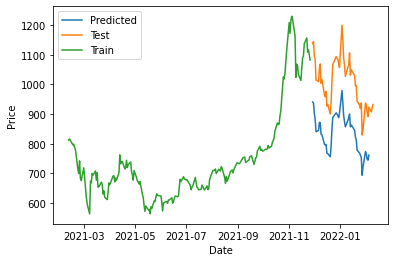

-------------------------------------------starting 6 months---------------------------------------------------
........................................................GOOGLE.............................................
target shape: (192, 1) feature shape: (192, 9, 1)
feature test length 42
Epoch 1/100
6/6 [==============================] - 2s 6ms/step - loss: 6685348.0000
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 6685317.5000
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 6685286.5000
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 6685255.5000
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 6685224.5000
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 6685194.0000
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 6685162.5000
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 6685132.5000
Epoch 9/100
6/6 [==================

6/6 [==============================] - 0s 4ms/step - loss: 6682482.5000
Epoch 95/100
6/6 [==============================] - 0s 5ms/step - loss: 6682450.5000
Epoch 96/100
6/6 [==============================] - 0s 6ms/step - loss: 6682420.5000
Epoch 97/100
6/6 [==============================] - 0s 6ms/step - loss: 6682389.5000
Epoch 98/100
6/6 [==============================] - 0s 9ms/step - loss: 6682358.0000
Epoch 99/100
6/6 [==============================] - 0s 6ms/step - loss: 6682328.0000
Epoch 100/100
6/6 [==============================] - 0s 5ms/step - loss: 6682296.5000
prediction length 42


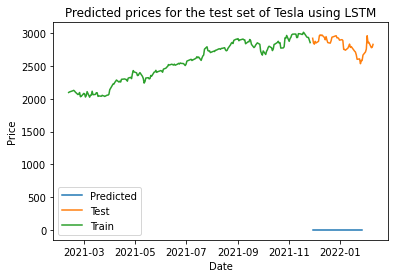

-------------------------------------------starting 6 months---------------------------------------------------
........................................................APPLE..............................................
target shape: (192, 1) feature shape: (192, 9, 1)
feature test length 42
Epoch 1/100
6/6 [==============================] - 2s 5ms/step - loss: 19321.4590
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 19314.6504
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 19306.4531
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 19295.2480
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 19276.1484
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 19235.3984
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 19147.2832
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 18670.8047
Epoch 9/100
6/6 [==============================] - 

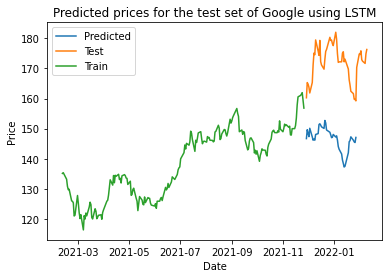

-------------------------------------------starting 6 months---------------------------------------------------


Text(0.5, 1.0, 'Predicted prices for the test set of Apple using LSTM')

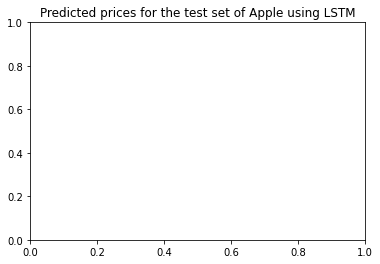

In [29]:
print('--------------------------------------------------------TESLA----------------------------------------------')
test_fit(tesla, 3, 1, 100, 10, 3)
plt.title('Predicted prices for the test set of Tesla using LSTM')

print('........................................................GOOGLE.............................................')
test_fit(google,  9, 1,100, 10, 9)
plt.title('Predicted prices for the test set of Google using LSTM')

print('........................................................APPLE..............................................')
test_fit(apple, 9, 1, 100, 10, 9)
plt.title('Predicted prices for the test set of Apple using LSTM')

#plt.legend()